In [2]:
import pandas as pd 
data_dir = "C:/Users/jessi/Downloads/green_tripdata_2018-10.csv"
df= pd.read_csv(data_dir)
# uploading the dataset 

In [3]:
df.columns

Index(['Vendor', 'lpep pickup datetime', 'lpep dropoff datetime',
       'store and fwd flag', 'Rate type', 'PU Location', 'DO Location',
       'passenger count', 'trip distance', 'fare amount', 'extra', 'mta tax',
       'tip amount', 'tolls amount', 'ehail fee', 'improvement surcharge',
       'total amount', 'payment type', 'trip type', 'congestion surcharge'],
      dtype='object')

In [3]:
df.info()
#exploring the columns, the size, the datatypes and the non-null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731899 entries, 0 to 731898
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Vendor                 731899 non-null  object 
 1   lpep pickup datetime   731899 non-null  object 
 2   lpep dropoff datetime  731899 non-null  object 
 3   store and fwd flag     709677 non-null  object 
 4   Rate type              731899 non-null  object 
 5   PU Location            731899 non-null  object 
 6   DO Location            731899 non-null  object 
 7   passenger count        708963 non-null  float64
 8   trip distance          731899 non-null  float64
 9   fare amount            731899 non-null  float64
 10  extra                  343382 non-null  float64
 11  mta tax                731899 non-null  float64
 12  tip amount             731899 non-null  float64
 13  tolls amount           731899 non-null  float64
 14  ehail fee              70 non-null  

In [4]:
df.corr(numeric_only=True)
#exploring the correlation between the columns 

,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,congestion surcharge
passenger count,1.000000,-0.006923,-0.003364,-0.006520,-0.005146,0.001563,-0.003033,NaN,0.027579,-0.002805,NaN
trip distance,-0.006923,1.000000,0.925063,0.340935,0.026852,0.148349,0.409466,NaN,-0.259175,0.916713,NaN
fare amount,-0.003364,0.925063,1.000000,0.499124,0.019400,0.143790,0.364385,NaN,-0.299086,0.983422,NaN
extra,-0.006520,0.340935,0.499124,1.000000,0.120920,-0.104614,0.146354,NaN,-0.732333,0.494971,NaN
mta tax,-0.005146,0.026852,0.019400,0.120920,1.000000,0.005307,-0.002634,NaN,0.518558,0.031251,NaN
tip amount,0.001563,0.148349,0.143790,-0.104614,0.005307,1.000000,0.063805,NaN,0.106736,0.285421,NaN
tolls amount,-0.003033,0.409466,0.364385,0.146354,-0.002634,0.063805,1.000000,NaN,-0.095474,0.451922,NaN
ehail fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
improvement surcharge,0.027579,-0.259175,-0.299086,-0.732333,0.518558,0.106736,-0.095474,NaN,1.000000,-0.272278,NaN
total amount,-0.002805,0.916713,0.983422,0.494971,0.031251,0.285421,0.451922,NaN,-0.272278,1.000000,NaN


In [4]:
def rename_columns(df):
#     make all cols lower case
    df.columns = df.columns.str.lower()
    # Iterate through the column names and replace space with underscore,
#     using list comprehension
    df.columns = [col.replace(' ', '_') for col in df.columns]
    
rename_columns(df)



In [5]:
# Calculating sum of null entries and percentage of null entries
sum_null = df.isnull().sum()
perc_null = df.isnull().sum() / len(df)
perc_null_mean = df.isnull().mean()*100
perc_null

vendor                   0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       0.030362
rate_type                0.000000
pu_location              0.000000
do_location              0.000000
passenger_count          0.031338
trip_distance            0.000000
fare_amount              0.000000
extra                    0.530834
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
ehail_fee                0.999904
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             0.028459
trip_type                0.000000
congestion_surcharge     1.000000
dtype: float64

In [6]:
df=df.drop(columns=['congestion_surcharge'])
# dropping the congestion_surcharge column as it is empty

In [7]:
df= df.drop_duplicates()
# dropping the duplicate rows

In [8]:
df['store_and_fwd_flag'].unique() # MCAR as it doesn't have any relation with any other variables  
df=df.dropna( subset=['store_and_fwd_flag']) #dropping missing values less than 5%

In [9]:
df['passenger_count'].unique()#MCAR
df=df.dropna( subset=['passenger_count']) #dropping missing values less than 5%

In [10]:
df['extra'].unique() #exploring the extra column values
df["extra"] = df["extra"].fillna(value=0) # imputing the extra nan values with 0 (MAR)

In [11]:
df['ehail_fee'].unique() #exploring the ehail_fee values
df=df.drop('ehail_fee',axis=1) # dropping it as it is almost empty

In [12]:
df['payment_type'].unique() #exploring the values of the payment_types
df["payment_type"] = df["payment_type"].fillna(value='Uknown') # (MAR) imputing the nans with Unknown 

In [13]:
# Calculating sum of null entries and percentage of null entries
sum_null = df.isnull().sum()
perc_null = df.isnull().sum() / len(df)
perc_null_mean = df.isnull().mean()*100
perc_null

vendor                   0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
rate_type                0.0
pu_location              0.0
do_location              0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
dtype: float64

In [14]:
def skewness(df):
    for column in df.columns:
        if(df[column].dtype==float):
            skeww = df[column].skew()
            print(f"Skewness of {column}: {skeww}")
      

In [15]:
skewness(df) # a generated method to observe the skewness of each column

Skewness of passenger_count: 165.67991372381786
Skewness of trip_distance: 2.7316722271547893
Skewness of fare_amount: 3.425102008337911
Skewness of extra: 1.01896199526069
Skewness of mta_tax: -8.582580919307313
Skewness of tip_amount: 39.265901929526144
Skewness of tolls_amount: 148.50727833184314
Skewness of improvement_surcharge: -4.685642954155484
Skewness of total_amount: 3.5433692688906095


In [16]:
def iqr(df):
    for column in df.columns:
        if(df[column].dtype==float):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            cut_off = IQR * 1.5
            lower = Q1 - cut_off
            upper =  Q3 + cut_off
            df1 = df[df[column]> upper]
            df2 = df[df[column] < lower]
            print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

    

In [17]:
iqr(df) # iqr helps in detecting the outliers (those are the number of outliers in each numerical column)

Total number of outliers are 102546
Total number of outliers are 60938
Total number of outliers are 49919
Total number of outliers are 561
Total number of outliers are 12736
Total number of outliers are 41673
Total number of outliers are 27243
Total number of outliers are 34453
Total number of outliers are 52371


In [18]:
df['passenger_count'].value_counts()

passenger_count
1.0      606410
2.0       53435
5.0       23811
6.0       11705
3.0        9989
4.0        3579
7.0          10
8.0           7
444.0         5
9.0           5
Name: count, dtype: int64

In [19]:
import numpy as np
def handling_with_mean(df,column):
    
    median = df[column].median()
    cutoff_pos = df[column].mean() + df[column].std() * 3
    cutoff_neg = df[column].mean() - df[column].std() * 3
    condition_series = ((df[column]> cutoff_pos) | (df[column] < cutoff_neg))
    df[column] = np.where(condition_series, median,df[column])
            


 # handling the outliers with mean       
    

In [20]:
handling_with_mean(df,'passenger_count')
df['passenger_count'].value_counts()

passenger_count
1.0    618142
2.0     53435
5.0     23811
3.0      9989
4.0      3579
Name: count, dtype: int64

In [21]:
df['mta_tax'].unique()
df['mta_tax'].value_counts()

mta_tax
 0.5    696220
 0.0     10860
-0.5      1876
Name: count, dtype: int64

In [22]:
def flooring_capping(df,column):
    floor = df[column].quantile(0.10)
    cap = df[column].quantile(0.90)
    df[column] = np.where(df[column] <floor, floor,df[column])
    df[column] = np.where(df[column] >cap,cap,df[column])
    
    #imputing the outliers using the flooring and capping technique

In [23]:
flooring_capping(df,'tip_amount')
df['tip_amount'].value_counts()

tip_amount
0.00    454443
3.09     71125
1.00     18207
2.00     13258
3.00      5235
         ...  
0.38         1
0.37         1
2.99         1
2.87         1
1.87         1
Name: count, Length: 305, dtype: int64

In [24]:
def update_total_amount(df):
    df['total_amount'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']

    # summing up all those columns to update the total_amount in case any of the values has been imputed

In [25]:
update_total_amount(df)

In [26]:
def change_datatype(df, column, format):
    df[column] = pd.to_datetime(df[column], format=format)


    # changing the datatype of the lpep pickup datetime and the lpep dropoff datetime into datetime 
   



In [27]:
df.corr(numeric_only=True)
#exploring the correlation between the columns 

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
passenger_count,1.000000,-0.004188,-0.001948,0.019916,-0.012595,0.000601,-0.003777,0.033622,-0.001511
trip_distance,-0.004188,1.000000,0.931582,-0.068956,0.023277,0.045470,0.393788,-0.165894,0.927731
fare_amount,-0.001948,0.931582,1.000000,-0.059393,0.013654,0.053280,0.359099,-0.136184,0.989442
extra,0.019916,-0.068956,-0.059393,1.000000,0.126307,0.070053,-0.025342,0.193380,-0.020178
mta_tax,-0.012595,0.023277,0.013654,0.126307,1.000000,0.046870,-0.004643,0.649404,0.030070
tip_amount,0.000601,0.045470,0.053280,0.070053,0.046870,1.000000,-0.000383,0.124448,0.142131
tolls_amount,-0.003777,0.393788,0.359099,-0.025342,-0.004643,-0.000383,1.000000,-0.061089,0.455035
improvement_surcharge,0.033622,-0.165894,-0.136184,0.193380,0.649404,0.124448,-0.061089,1.000000,-0.109482
total_amount,-0.001511,0.927731,0.989442,-0.020178,0.030070,0.142131,0.455035,-0.109482,1.000000


In [28]:

def one_hot_encode_column(df, column):
    one_hot = pd.get_dummies(df[column], prefix=column)
    
  
    one_hot = one_hot.astype(int)
    
    df = pd.concat([df, one_hot], axis=1)
    df.drop(column, axis=1, inplace=True)
    
    return df
# generating one-hot encoding method


In [29]:

df = one_hot_encode_column(df, 'vendor')


In [30]:

from sklearn import preprocessing

def number_encode_features(df,column):
        df[column] = preprocessing.LabelEncoder().fit_transform(df[column])
        return df
   
    
            # Apply LabelEncoder method
            

In [31]:
df=number_encode_features(df,'store_and_fwd_flag')

In [32]:
df=one_hot_encode_column(df,'rate_type')

In [33]:


def frequency_encoding(df, column):
    # Calculate the frequency of each category
    frequency_map = df[column].value_counts(normalize=True).to_dict()

    # Map the frequency values to the column
    df[column + '_freq_encoded'] = df[column].map(frequency_map)
 



    return df
# applying the frequency encoding technqiue

In [34]:
df=frequency_encoding(df,'pu_location')

In [35]:
def get_unique_values_with_encoded(df, column, encoded_column):
    
    unique_values_with_encoded = {}
    
    for index, row in df.iterrows():
        original_value = row[column]
        encoded_value = row[encoded_column]
        unique_values_with_encoded[original_value] = encoded_value

    return unique_values_with_encoded


In [36]:
df=frequency_encoding(df,'do_location')

In [37]:
df=number_encode_features(df,'payment_type')

In [38]:
df= number_encode_features(df,'trip_type')

In [40]:
df.corr(numeric_only=True)

,store_and_fwd_flag,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,...,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,rate_type_Group ride,rate_type_JFK,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,pu_location_freq_encoded,do_location_freq_encoded
store_and_fwd_flag,1.000000,-0.005339,-0.007005,-0.005695,0.005154,-0.003082,0.003353,0.006046,0.005108,-0.004213,...,0.121727,-0.121727,0.007164,-0.000262,-0.000243,-0.004227,0.004385,0.003642,-0.009590,-0.008170
passenger_count,-0.005339,1.000000,-0.004188,-0.001948,0.019916,-0.012595,0.000601,-0.003777,0.033622,-0.001511,...,-0.048755,0.048755,-0.001178,-0.001131,0.000430,-0.041336,0.002200,0.040107,-0.006600,-0.001720
trip_distance,-0.007005,-0.004188,1.000000,0.931582,-0.068956,0.023277,0.045470,0.393788,-0.165894,0.927731,...,-0.043957,0.043957,-0.002448,0.097443,0.075118,0.210790,0.046705,-0.237510,-0.241928,-0.311199
fare_amount,-0.005695,-0.001948,0.931582,1.000000,-0.059393,0.013654,0.053280,0.359099,-0.136184,0.989442,...,-0.046912,0.046912,-0.003707,0.122234,0.099215,0.197500,0.065437,-0.234225,-0.245568,-0.321355
extra,0.005154,0.019916,-0.068956,-0.059393,1.000000,0.126307,0.070053,-0.025342,0.193380,-0.020178,...,0.028298,-0.028298,-0.003019,0.053607,-0.001840,-0.174934,-0.004432,0.159761,0.049739,0.037164
mta_tax,-0.003082,-0.012595,0.023277,0.013654,0.126307,1.000000,0.046870,-0.004643,0.649404,0.030070,...,0.002544,-0.002544,-0.004221,-0.008489,0.000229,-0.377281,-0.124976,0.379821,0.048623,0.014084
tip_amount,0.003353,0.000601,0.045470,0.053280,0.070053,0.046870,1.000000,-0.000383,0.124448,0.142131,...,0.120157,-0.120157,-0.002562,0.025052,0.008834,-0.118325,0.008616,0.107999,0.088141,-0.080204
tolls_amount,0.006046,-0.003777,0.393788,0.359099,-0.025342,-0.004643,-0.000383,1.000000,-0.061089,0.455035,...,-0.019265,0.019265,-0.000559,0.098039,0.031354,0.074241,0.095910,-0.104551,-0.061373,-0.068917
improvement_surcharge,0.005108,0.033622,-0.165894,-0.136184,0.193380,0.649404,0.124448,-0.061089,1.000000,-0.109482,...,0.058788,-0.058788,-0.002409,-0.000464,0.003551,-0.868988,0.002107,0.842951,0.142752,0.081663
total_amount,-0.004213,-0.001511,0.927731,0.989442,-0.020178,0.030070,0.142131,0.455035,-0.109482,1.000000,...,-0.034731,0.034731,-0.003929,0.130815,0.098193,0.172470,0.072923,-0.212233,-0.228874,-0.317254


In [39]:
import pandas as pd
import numpy as np


# Calculate the quantiles for 3 bins (low, medium, high)
quantiles = df['total_amount'].quantile([0.33, 0.66]).values

# Function to categorize fare amount
def categorize_fare(fare):
    if fare <= quantiles[0]:
        return 'low'
    elif fare <= quantiles[1]:
        return 'medium'
    else:
        return 'high'

# Apply the categorization function to the fare_amount column
df['fare_category'] = df['total_amount'].apply(categorize_fare)

print(df['fare_category'].unique())


['high' 'low' 'medium']


In [40]:
df=number_encode_features(df,'fare_category')

In [43]:
print(df['fare_category'])

0         0
1         1
2         2
3         1
4         2
         ..
709665    2
709666    2
731888    1
731889    2
731890    1
Name: fare_category, Length: 708956, dtype: int32


In [41]:
from sklearn.model_selection import train_test_split



selected_features = [
     'trip_distance', 'fare_amount', 'extra', 'mta_tax',
    'tip_amount', 'tolls_amount', 'improvement_surcharge'

]
X = df[selected_features]
y=df['fare_category']

# Assuming you have already loaded and preprocessed your data, and defined X and y
# X contains the features, and y contains the target variable


# Assuming X and y are already defined

# Split the data into training, validation, and test sets
# First, split the data into 80% training and 20% remaining
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the remaining data into 50% validation and 50% test
# Since 20% of the original data is 25% of the remaining data,
# we set the test size to 0.25 to get 20% of the original data as the test set
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.25, random_state=42)

# Now, X_train, y_train contain 60% of the original data as the training set
# X_validation, y_validation contain 20% of the original data as the validation set
# X_test, y_test contain 20% of the original data as the test set


# 'test_size=0.2' specifies that 20% of the data will be used for testing,
# and the remaining 80% will be used for training.

# 'random_state=42' is a random seed that ensures reproducibility.
# You can choose any integer value or omit it for a different random split each time.


In [45]:
y_train.head()

573571    2
544881    2
486569    0
79181     2
165382    2
Name: fare_category, dtype: int32

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708956 entries, 0 to 731890
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   lpep_pickup_datetime                      708956 non-null  object 
 1   lpep_dropoff_datetime                     708956 non-null  object 
 2   store_and_fwd_flag                        708956 non-null  int32  
 3   pu_location                               708956 non-null  object 
 4   do_location                               708956 non-null  object 
 5   passenger_count                           708956 non-null  float64
 6   trip_distance                             708956 non-null  float64
 7   fare_amount                               708956 non-null  float64
 8   extra                                     708956 non-null  float64
 9   mta_tax                                   708956 non-null  float64
 10  tip_amount               

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Instantiate Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Predict on the validation set
y_validation_pred = gnb.predict(X_validation)

# Calculate accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print("Gaussian Naive Bayes Validation Accuracy:", validation_accuracy)

# Predict on the test set
y_test_pred = gnb.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Gaussian Naive Bayes Test Accuracy:", test_accuracy)


Gaussian Naive Bayes Validation Accuracy: 0.8799085985104943
Gaussian Naive Bayes Test Accuracy: 0.8803599638907695


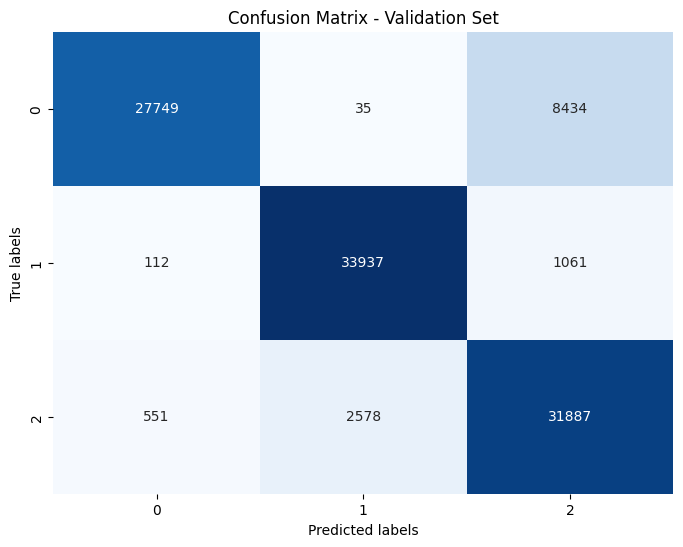

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86     36218
           1       0.93      0.97      0.95     35110
           2       0.77      0.91      0.83     35016

    accuracy                           0.88    106344
   macro avg       0.89      0.88      0.88    106344
weighted avg       0.89      0.88      0.88    106344



In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities on the validation set
y_validation_prob = gnb.predict_proba(X_validation)

# Convert predicted probabilities to predicted labels
y_validation_pred = gnb.predict(X_validation)

# Compute confusion matrix
cm = confusion_matrix(y_validation, y_validation_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Validation Set')
plt.show()

# Print classification report
print("Classification Report - Validation Set:")
print(classification_report(y_validation, y_validation_pred))


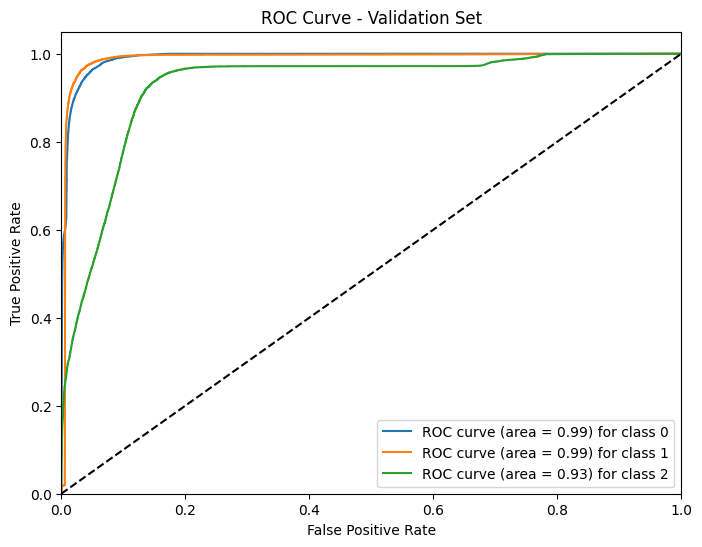

In [59]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC
n_classes = len(np.unique(y_validation))
y_validation_bin = label_binarize(y_validation, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_validation_bin[:, i], y_validation_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc="lower right")
plt.show()


In [60]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Instantiate Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define the number of splits for k-fold cross-validation
n_splits = 5
# Create a KFold instance
kf = KFold(n_splits=n_splits)

# Perform k-fold cross-validation
kf_scores = cross_val_score(gnb, X_train, y_train, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("K-Fold Cross-Validation Scores:", kf_scores)
print("Mean Accuracy:", kf_scores.mean())


K-Fold Cross-Validation Scores: [0.8788536  0.88215951 0.88266201 0.88161293 0.87953135]
Mean Accuracy: 0.8809638809364986


In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Instantiate Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define the number of splits for Stratified k-fold cross-validation
n_splits = 5
# Create a StratifiedKFold instance
skf = StratifiedKFold(n_splits=n_splits)

# Perform stratified k-fold cross-validation
skf_scores = cross_val_score(gnb, X_train, y_train, cv=skf, scoring='accuracy')

# Print the cross-validation scores
print("Stratified K-Fold Cross-Validation Scores:", skf_scores)
print("Mean Accuracy:", skf_scores.mean())


Stratified K-Fold Cross-Validation Scores: [0.87890649 0.88194793 0.88257385 0.88117215 0.88026307]
Mean Accuracy: 0.8809726980033414


In [62]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Random Resampling
X_resampled, y_resampled = resample(X_train, y_train, n_samples=10000, random_state=42)

# Initialize and fit the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_resampled, y_resampled)

# Predict and evaluate on the validation set
y_validation_pred = gnb.predict(X_validation)
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print("Validation Accuracy after Random Resampling:", validation_accuracy)

# Predict and evaluate on the test set
y_test_pred = gnb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy after Random Resampling:", test_accuracy)


Validation Accuracy after Random Resampling: 0.8609136387572407
Test Accuracy after Random Resampling: 0.859963890769578


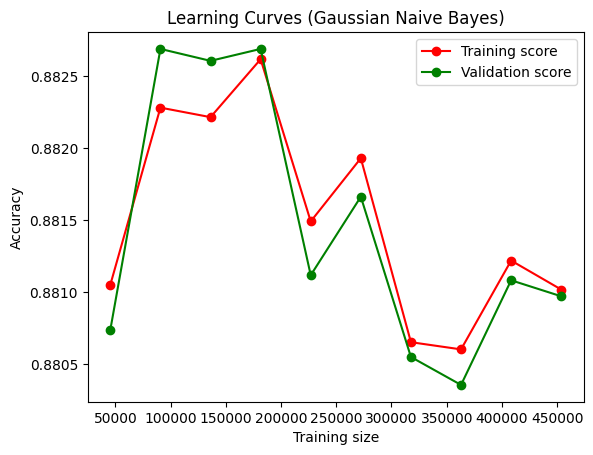

In [63]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Learning Curves
train_sizes, train_scores, validation_scores = learning_curve(gnb, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Validation score')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Learning Curves (Gaussian Naive Bayes)')
plt.legend(loc='best')
plt.show()


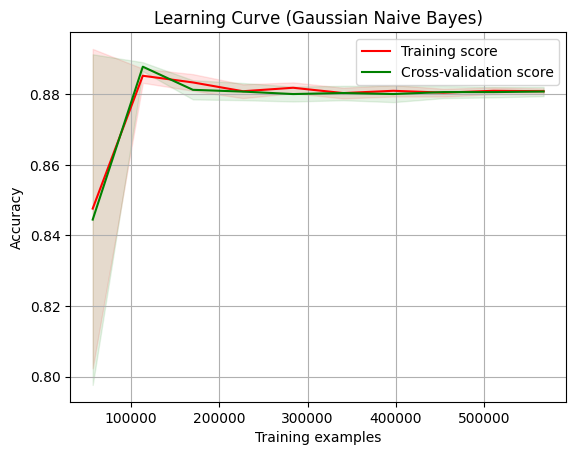

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

# Assuming X and y are already defined as your features and target variable respectively
# Define the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Use learning_curve function to get the training and validation scores
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=gnb,
    X=X,
    y=y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 sizes from 10% to 100% of the data
    scoring='accuracy'
)

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve (Gaussian Naive Bayes)')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')

# Plot the average training and validation scores
plt.plot(train_sizes, train_scores_mean, label='Training score', color='r')
plt.plot(train_sizes, validation_scores_mean, label='Cross-validation score', color='g')

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, color='g', alpha=0.1)

plt.legend(loc='best')
plt.grid()
plt.show()


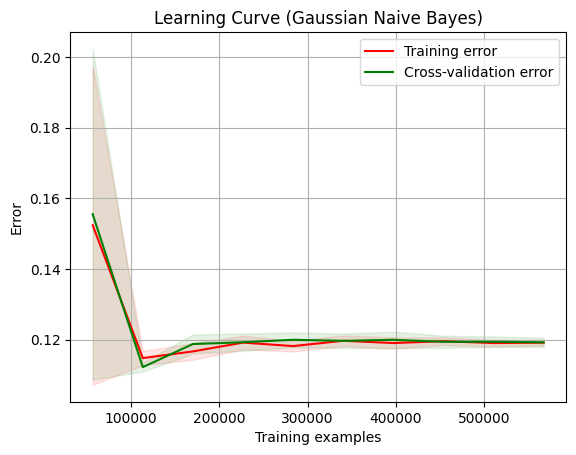

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

# Assuming X and y are already defined as your features and target variable respectively
# Define the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Use learning_curve function to get the training and validation scores
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=gnb,
    X=X,
    y=y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 sizes from 10% to 100% of the data
    scoring='accuracy'
)

# Convert accuracy scores to error rates
train_errors = 1 - train_scores
validation_errors = 1 - validation_scores

# Calculate the mean and standard deviation of the training and validation errors
train_errors_mean = np.mean(train_errors, axis=1)
train_errors_std = np.std(train_errors, axis=1)
validation_errors_mean = np.mean(validation_errors, axis=1)
validation_errors_std = np.std(validation_errors, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve (Gaussian Naive Bayes)')
plt.xlabel('Training examples')
plt.ylabel('Error')

# Plot the average training and validation errors
plt.plot(train_sizes, train_errors_mean, label='Training error', color='r')
plt.plot(train_sizes, validation_errors_mean, label='Cross-validation error', color='g')

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                 train_errors_mean + train_errors_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, validation_errors_mean - validation_errors_std,
                 validation_errors_mean + validation_errors_std, color='g', alpha=0.1)

plt.legend(loc='best')
plt.grid()
plt.show()





In [44]:
from sklearn.model_selection import train_test_split



selected_features = [
     'trip_distance', 'fare_amount', 'extra', 'mta_tax',
    'tip_amount', 'tolls_amount', 'improvement_surcharge'

]
X = df[selected_features]
y=df['fare_category']


X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)


X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.25, random_state=42)

#  X_train, y_train contain 60% of the original data as the training set
# X_validation, y_validation contain 20% of the original data as the validation set
# X_test, y_test contain 20% of the original data as the test set




In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Instantiate Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Predict on the validation set
y_validation_pred = gnb.predict(X_validation)

# Calculate accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print("Gaussian Naive Bayes Validation Accuracy:", validation_accuracy)

# Predict on the test set
y_test_pred = gnb.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Gaussian Naive Bayes Test Accuracy:", test_accuracy)


Gaussian Naive Bayes Validation Accuracy: 0.8799085985104943
Gaussian Naive Bayes Test Accuracy: 0.8803599638907695


The accuracy on both the validation and test sets is around 98%. This indicates that the model is not overfitting.

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities on the validation set
y_validation_prob = gnb.predict_proba(X_validation)

# Convert predicted probabilities to predicted labels
y_validation_pred = gnb.predict(X_validation)

# Compute confusion matrix
cm = confusion_matrix(y_validation, y_validation_pred)

# Print confusion matrix
print("Confusion Matrix - Validation Set:")
print(cm)

# Print classification report
print("\nClassification Report - Validation Set:")
print(classification_report(y_validation, y_validation_pred))


Confusion Matrix - Validation Set:
[[27749    35  8434]
 [  112 33937  1061]
 [  551  2578 31887]]

Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86     36218
           1       0.93      0.97      0.95     35110
           2       0.77      0.91      0.83     35016

    accuracy                           0.88    106344
   macro avg       0.89      0.88      0.88    106344
weighted avg       0.89      0.88      0.88    106344



The previous results show that the model is a good fit.

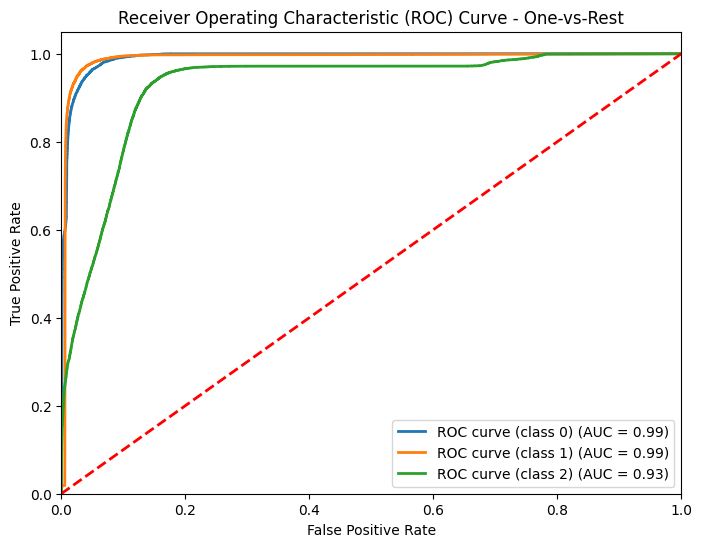

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes=3
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_validation == i, y_validation_prob[:, i])
    roc_auc[i] = roc_auc_score(y_validation == i, y_validation_prob[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc='lower right')
plt.show()


The curve for all three classes is close to the upper left corner of the graph, which indicates good performance. The AUC for Class 0 and Class 1 is 1.0, which is a perfect score.

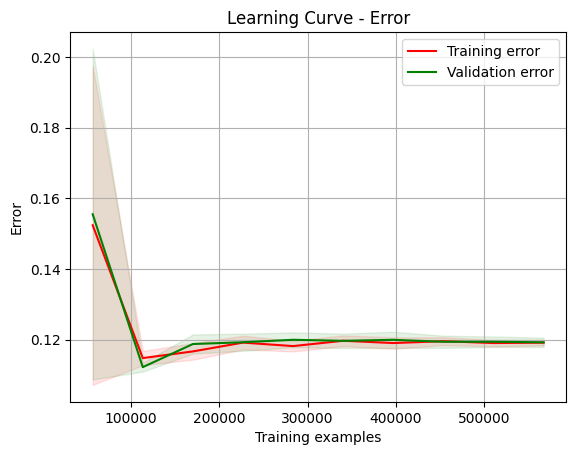

In [54]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_errors_mean = 1 - np.mean(train_scores, axis=1)
train_errors_std = np.std(train_scores, axis=1)
validation_errors_mean = 1 - np.mean(validation_scores, axis=1)
validation_errors_std = np.std(validation_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_errors_mean, label='Training error', color='r')
plt.plot(train_sizes, validation_errors_mean, label='Validation error', color='g')
plt.fill_between(train_sizes, train_errors_mean - train_errors_std, train_errors_mean + train_errors_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, validation_errors_mean - validation_errors_std, validation_errors_mean + validation_errors_std, color='g', alpha=0.1)
plt.title('Learning Curve - Error')
plt.xlabel('Training examples')
plt.ylabel('Error')
plt.legend(loc='best')
plt.grid()
plt.show()


This suggests that the model is learning from the data and that it is generalizing well to unseen data. 